<a href="https://colab.research.google.com/github/peterkahumu/FINANCIAL-RISK-FOR-LOAN-APPROVAL-PREDICTION/blob/main/FINANCIAL_RISK_FOR_LOAN_APPROVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ! pip install kaggle


In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import zipfile

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

# set the colur pallette using seaborn
sns.set_palette(palette = 'dark')
sns.set_style("darkgrid")
sns.set_context("notebook")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# grid of the plots.
sns.set_style('whitegrid')
with open('/content/kaggle.json', 'r') as f:
    data = json.load(f)

# Set environment variables for Kaggle API
os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

# Download the dataset
!kaggle datasets download -d lorenzozoppelletto/financial-risk-for-loan-approval

# Unzip the downloaded file
with zipfile.ZipFile('financial-risk-for-loan-approval.zip', 'r') as zip_ref:
    zip_ref.extractall('financial-risk-dataset')  # Directory to extract the file to.


Dataset URL: https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval
License(s): CC0-1.0
financial-risk-for-loan-approval.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# load the dataset.
data = pd.read_csv('/content/financial-risk-dataset/Loan.csv')
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,2,Own,183,0.354418,1,2,0.358336,0,Home,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,1,Mortgage,496,0.087827,5,3,0.330274,0,Debt Consolidation,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,Rent,902,0.137414,2,0,0.244729,0,Education,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,1,Mortgage,755,0.267587,2,1,0.436244,0,Home,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,1,Mortgage,274,0.320535,0,0,0.078884,0,Debt Consolidation,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
data = data.drop('ApplicationDate', axis = 1) # drop the ApplicationDate column.

In [ ]:
# check for missing data.
data.isnull().sum()

,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0
NumberOfDependents,0


In [ ]:
# check for duplicates.
data.duplicated().sum()

0

In [ ]:
# view the columns and their datatypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  int64  
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              20000 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               20000 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

The data is clean with no missing data or duplicated columns.

## Exploratory data analysis.

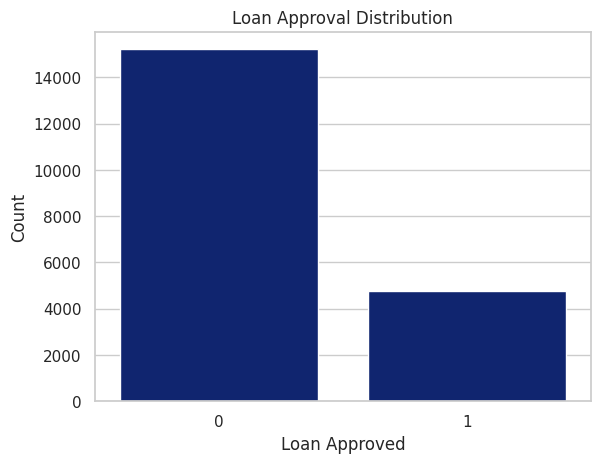

In [ ]:
# distribution of th loan approval columns (check for bias.)

sns.barplot(data = data['LoanApproved'].value_counts())
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()

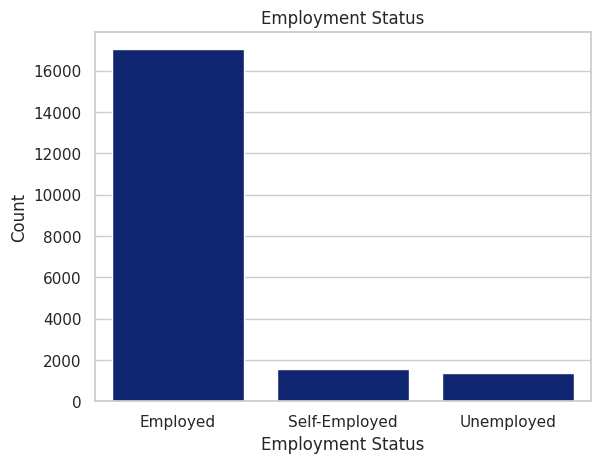

In [ ]:
# counts of occurences of different employment status fields.

sns.barplot(data = data['EmploymentStatus'].value_counts())
plt.title('Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()

Most of the individual are employed.

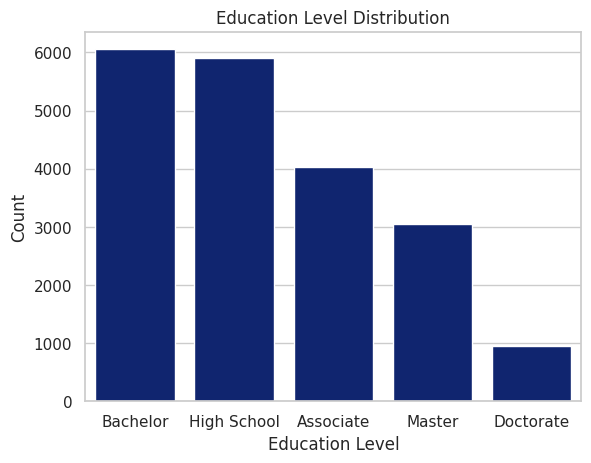

In [ ]:
# occurrencies by eduction level.
sns.barplot(data = data['EducationLevel'].value_counts())
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.show()

Text(0.5, 1.0, 'Home Ownership Status Distribution')

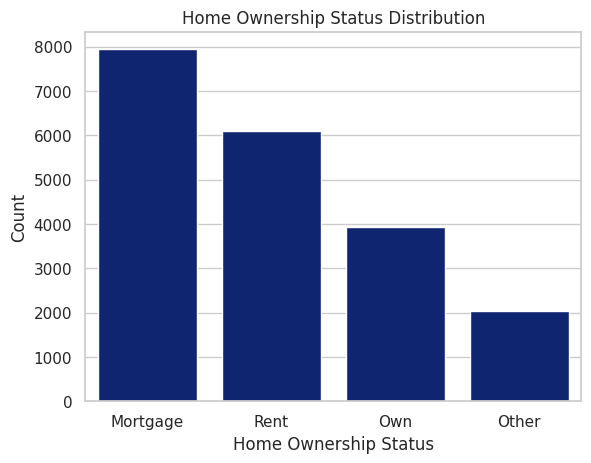

In [ ]:
# HomeOwnershipStatus
sns.barplot(data = data['HomeOwnershipStatus'].value_counts())
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.title('Home Ownership Status Distribution')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Home'),
  Text(1, 0, 'Debt Consolidation'),
  Text(2, 0, 'Auto'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'Other')])

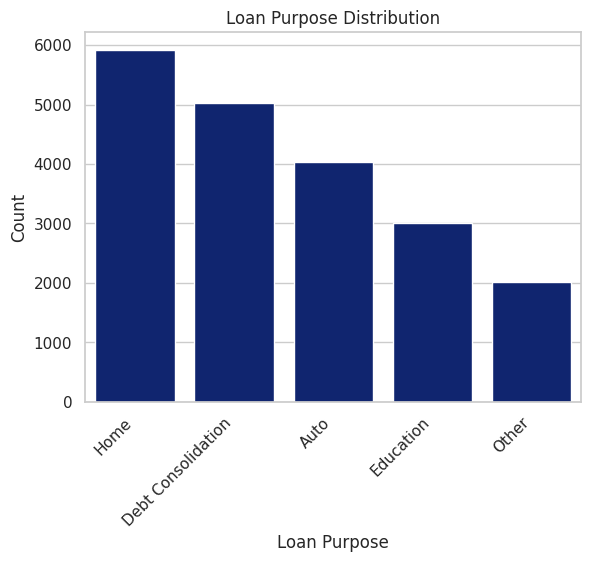

In [ ]:
# LoanPurpose
sns.barplot(data = data['LoanPurpose'].value_counts())
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title('Loan Purpose Distribution')
# rotate the labels by 45 degrees
plt.xticks(rotation=45, horizontalalignment='right')

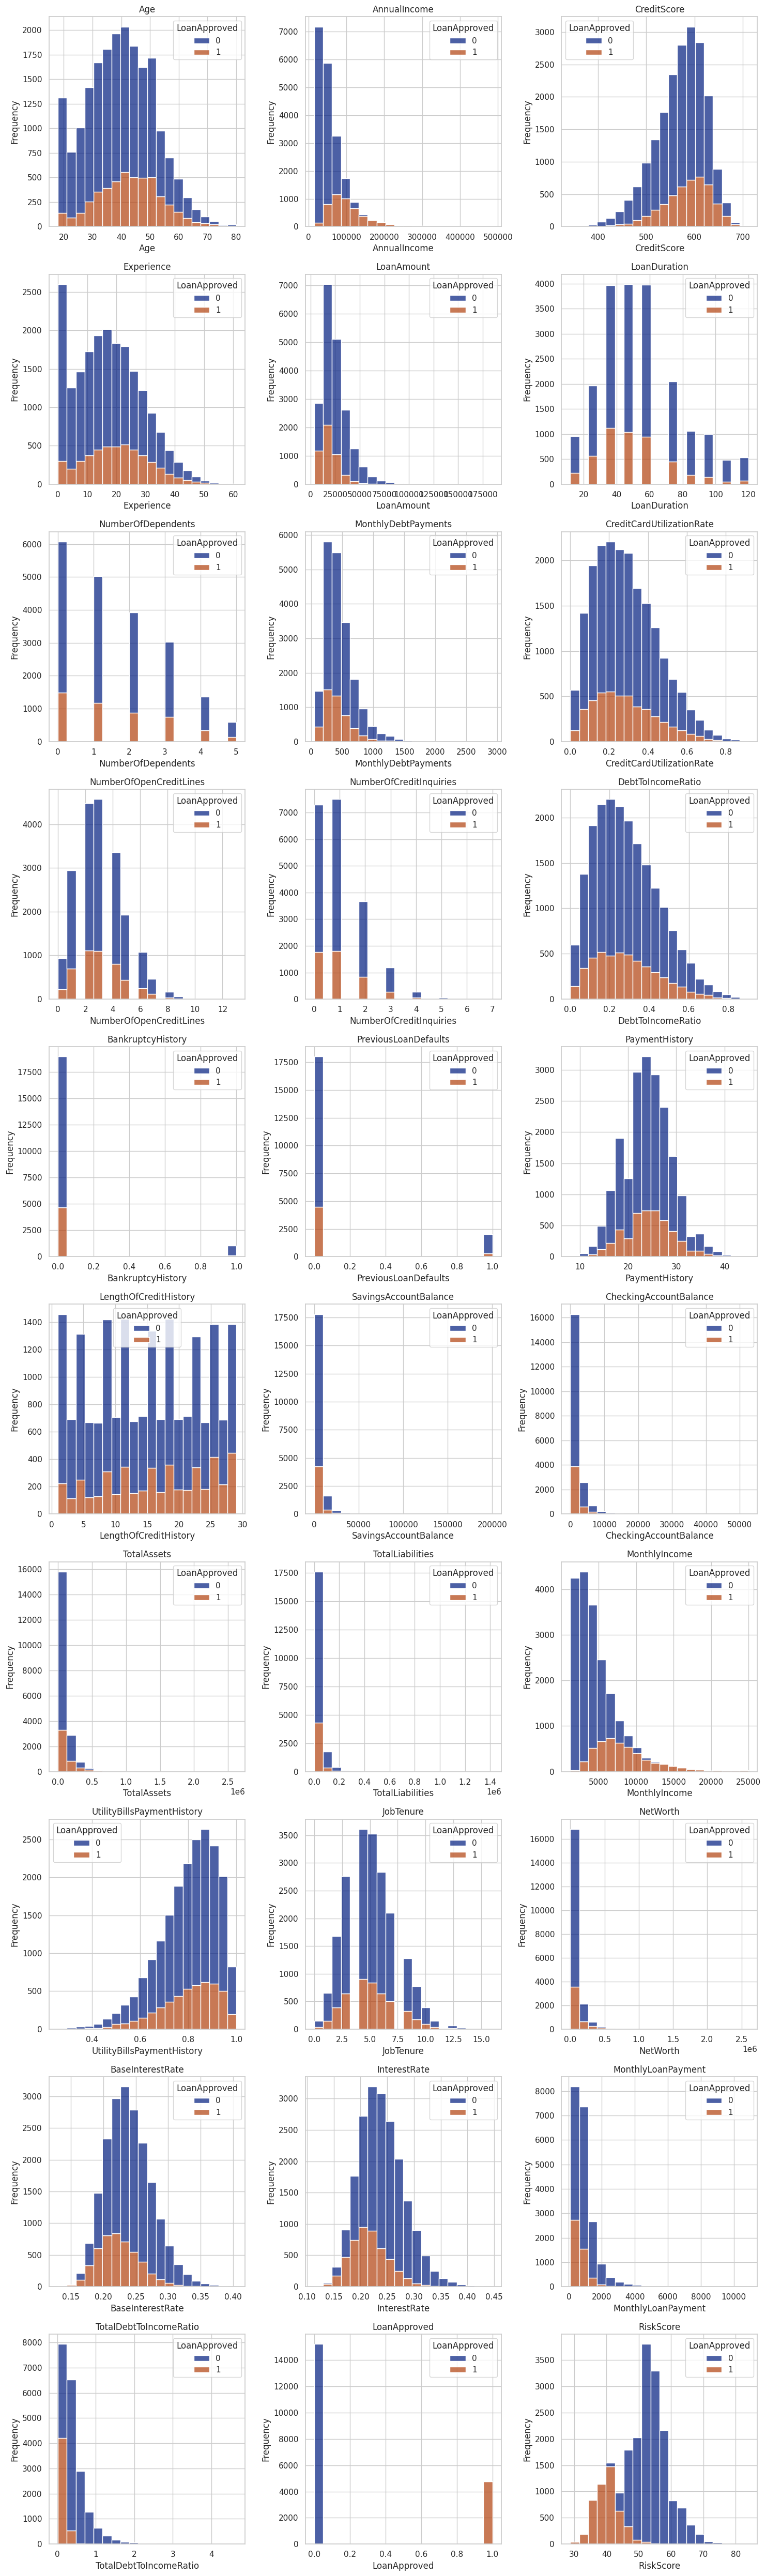

In [ ]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=['number'])

# Define the number of subplots needed
num_columns = len(numerical_data.columns)
cols = 3  # Number of columns in the subplot
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through numerical columns and create histograms
for i, column in enumerate(numerical_data.columns):
      sns.histplot(data=numerical_data, x=column, hue='LoanApproved', bins=20,
                 ax=axes[i], alpha=0.7, multiple='stack')
      axes[i].set_title(column)
      axes[i].set_xlabel(column)
      axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


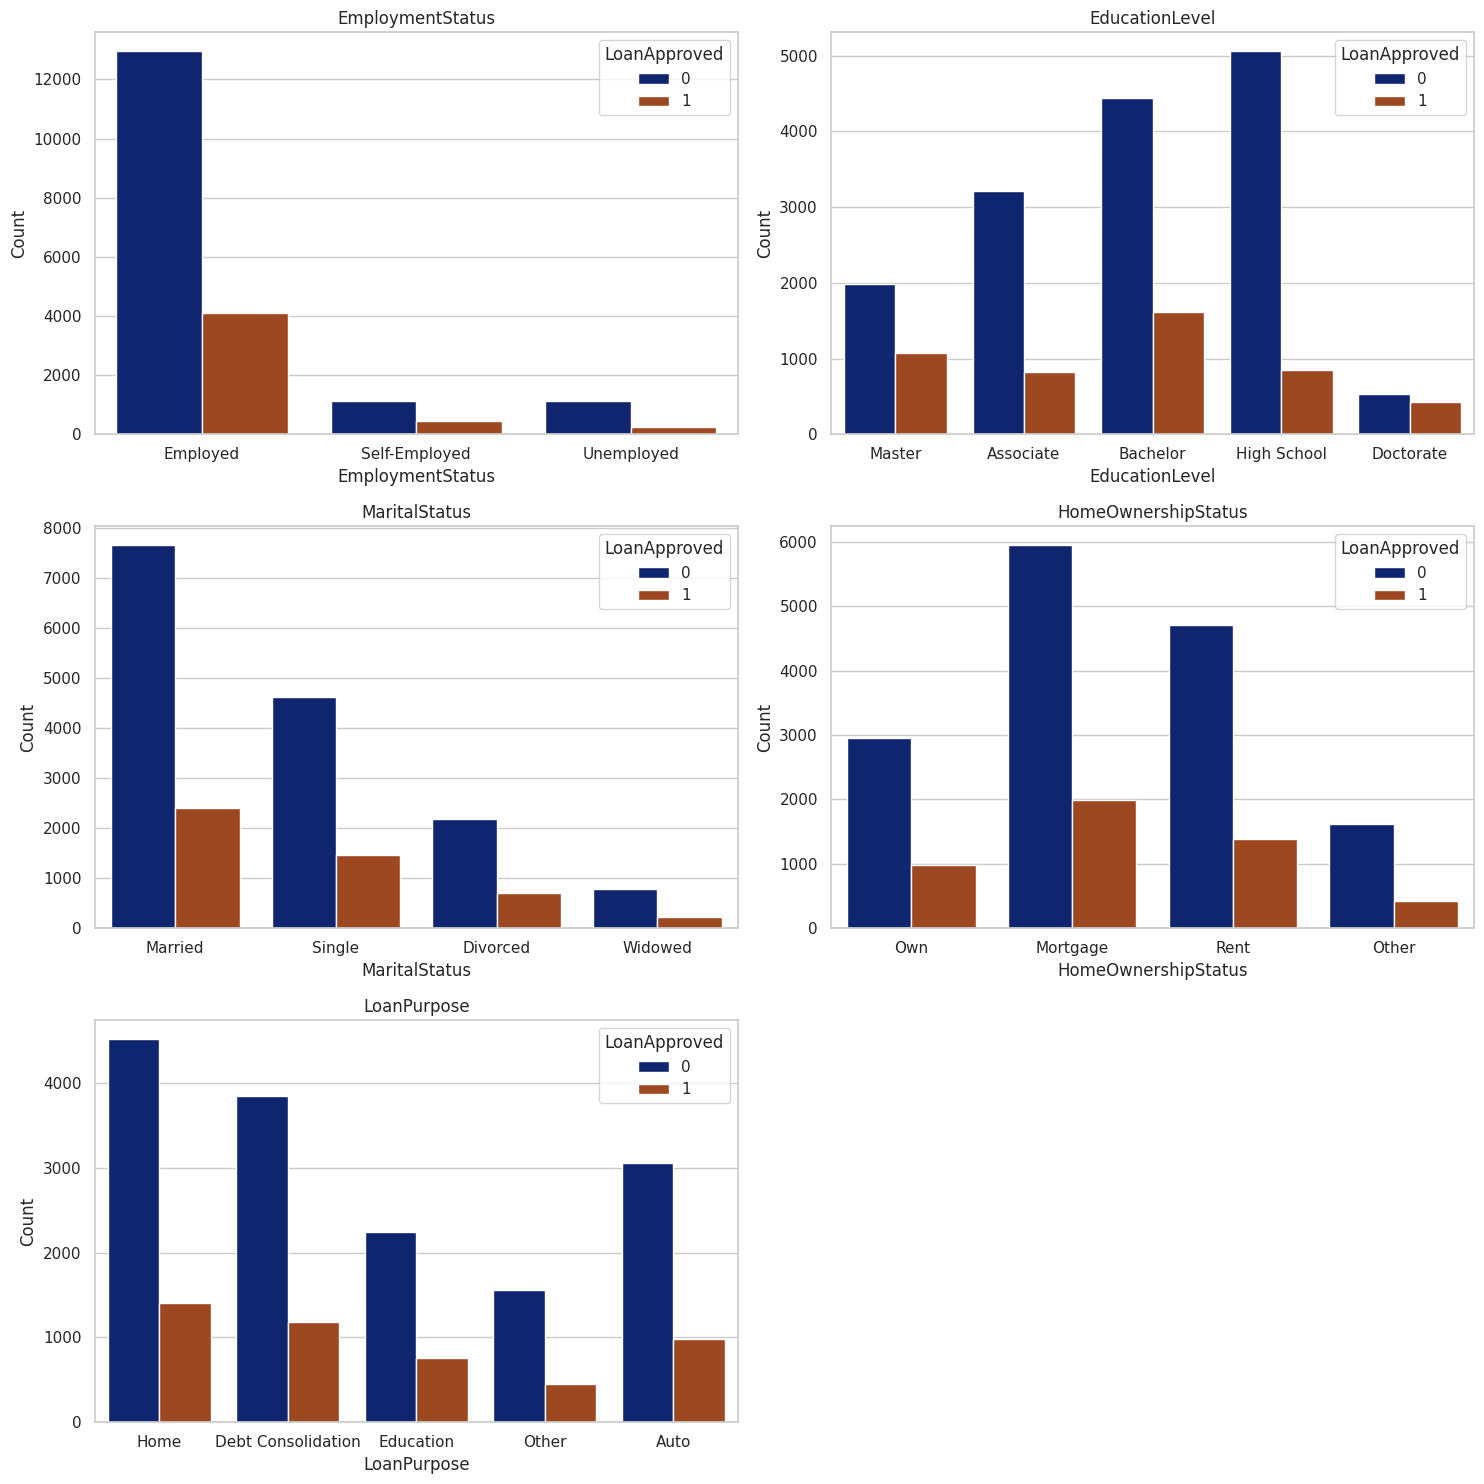

In [ ]:
import math

# Get categorical columns
categorical_columns = data.select_dtypes(include=['object'])

# Calculate the number of rows required (rounding up if odd)
rows = math.ceil(len(categorical_columns.columns) / 2)

# Create subplots with the correct number of rows and columns (2 per row)
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop over the categorical columns and create countplots
for i, column in enumerate(categorical_columns.columns):
    sns.countplot(data=data, x=column, hue="LoanApproved", ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any unused axes (in case the number of columns is odd)
for i in range(len(categorical_columns.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Loan Amount')

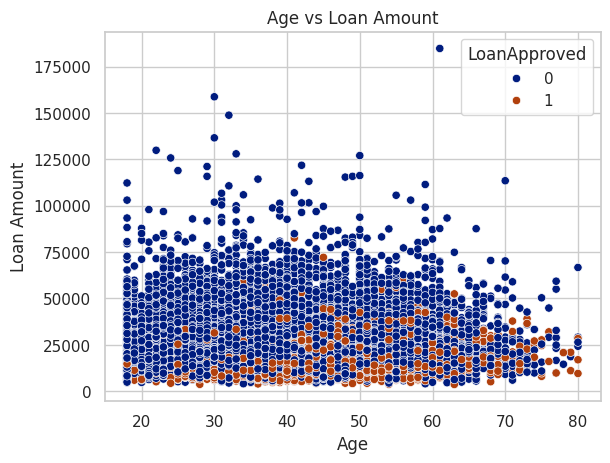

In [ ]:
sns.scatterplot(data = data,  x = 'Age',  y='LoanAmount', hue = 'LoanApproved')
plt.title('Age vs Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')

Text(0, 0.5, 'Debt to Income Ratio')

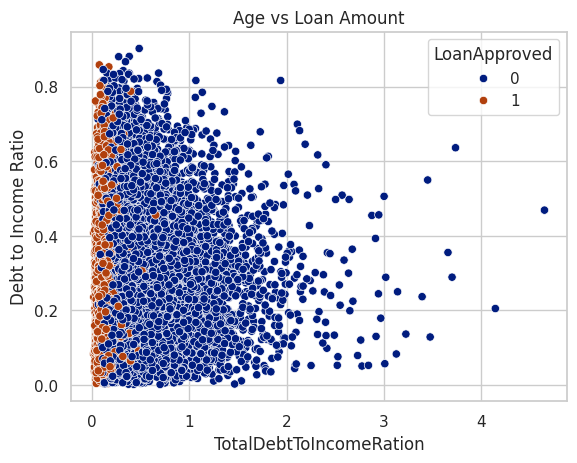

In [ ]:
sns.scatterplot(data = data,  x = 'TotalDebtToIncomeRatio',  y='DebtToIncomeRatio', hue = 'LoanApproved')
plt.title('Age vs Loan Amount')
plt.xlabel('TotalDebtToIncomeRation')
plt.ylabel('Debt to Income Ratio')

Interesting 😁😁😁

People with high Total debts to income ratio had their loans rejected.

Based on the above visualization, the percentage of loans approved seems to depend with the level of education, comparing each group by percentage. More analysis is done below.

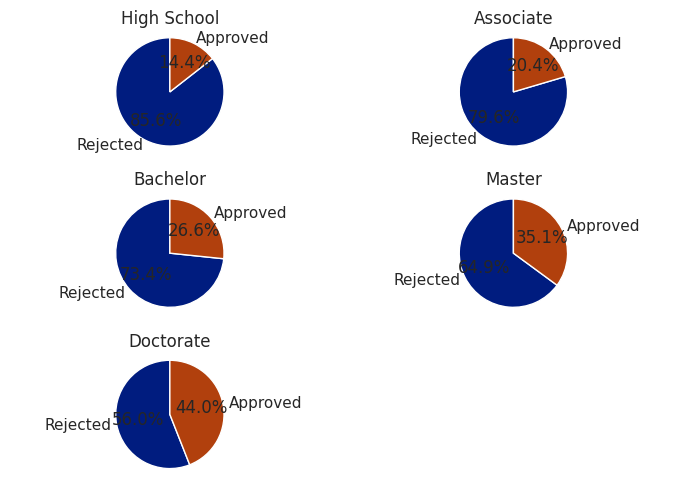

In [ ]:
desired_order = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']

data['EducationLevel'] = pd.Categorical(data['EducationLevel'], categories=desired_order, ordered=True)

grouped_data = data.groupby(['EducationLevel', 'LoanApproved']).size().unstack(fill_value = 0)

n_cols = len(grouped_data.columns)// + 1
fig, axes = plt.subplots(nrows=3, ncols=n_cols, figsize = (7, 5))
axes = axes.flatten()

for ax, (education_level, row) in zip(axes, grouped_data.iterrows()):
  ax.pie(row, labels = ['Rejected', 'Approved'], autopct = '%1.1f%%', startangle = 90)
  ax.set_title(education_level)
  ax.axis('equal')

# remove unused plots.
for i in range(len(grouped_data.columns), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()

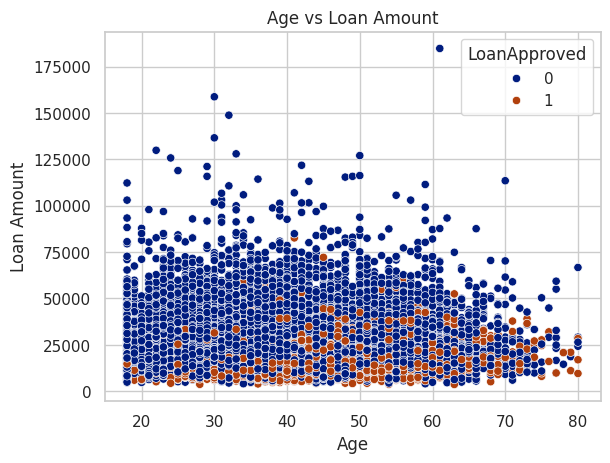

In [ ]:
sns.scatterplot(data = data, x = 'Age', y = 'LoanAmount', hue = 'LoanApproved')
plt.title('Age vs Loan Amount')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()


Age seems to contribute in a way to the probabilty of loan approval. Most of the younger individuals had their loans rejected.

Text(0, 0.5, 'Loan Amount')

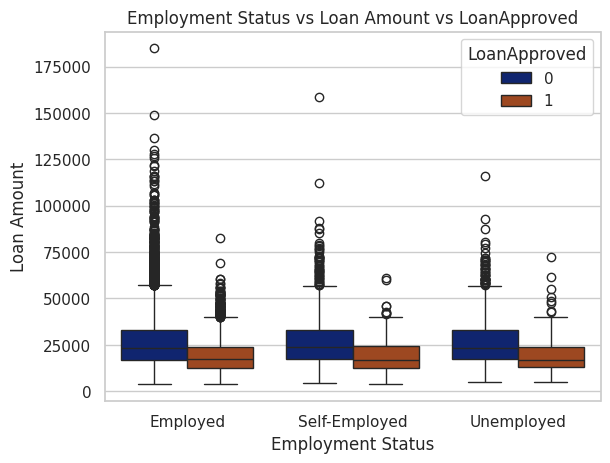

In [ ]:
sns.boxplot(data = data, x = 'EmploymentStatus', y = 'LoanAmount', hue = 'LoanApproved')
plt.title('Employment Status vs Loan Amount vs LoanApproved')
plt.xlabel('Employment Status')
plt.ylabel('Loan Amount')

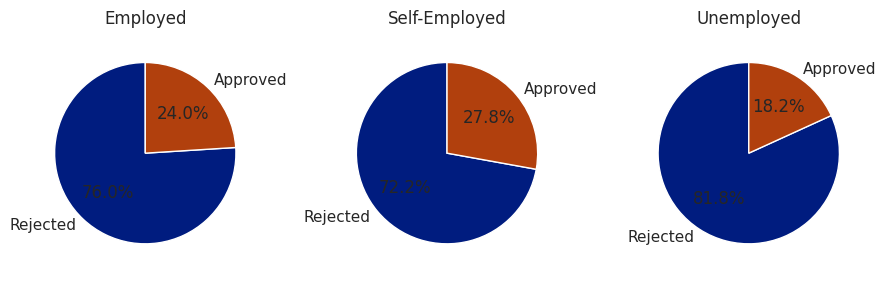

In [ ]:
grouped_data = data.groupby(['EmploymentStatus', 'LoanApproved']).size().unstack(fill_value=0)

fig, axes =plt.subplots(nrows=1, ncols=3 , figsize = (9, 3))
axes = axes.flatten()

for ax, (column, row) in zip(axes, grouped_data.iterrows()):
  ax.pie(row, labels = ['Rejected', 'Approved'], autopct = '%1.1f%%', startangle = 90)
  ax.set_title(column)
  ax.axis('equal')

for i in range(len(grouped_data.columns), len(axes)):
  axes[i].axis('off')

plt.tight_layout()
plt.show()


Employed individual had a higher chance of having their loans approved compared to unemployed people.

## Data Preparation and Feature Engineering

In [ ]:
categorical_columns.head()

,EmploymentStatus,EducationLevel,MaritalStatus,HomeOwnershipStatus,LoanPurpose
0,Employed,Master,Married,Own,Home
1,Employed,Associate,Single,Mortgage,Debt Consolidation
2,Employed,Bachelor,Married,Rent,Education
3,Employed,High School,Single,Mortgage,Home
4,Employed,Associate,Married,Mortgage,Debt Consolidation


In [ ]:
# Ordinal Encoding for education level.
data['EducationLevel'].unique()

education_level_mapping = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}

data['EducationLevel'] = data['EducationLevel'].map(education_level_mapping).astype(int)


In [ ]:
# label encode the remaining categorical columns.
LE = LabelEncoder()

# remove education level from categorical_columns
categorical_columns = categorical_columns.drop('EducationLevel', axis = 1)

for column in categorical_columns.columns:
  data[column] = LE.fit_transform(data[column])

data.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,DebtToIncomeRatio,BankruptcyHistory,LoanPurpose,PreviousLoanDefaults,PaymentHistory,LengthOfCreditHistory,SavingsAccountBalance,CheckingAccountBalance,TotalAssets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,0,4,22,13152,48,1,2,2,183,0.354418,1,2,0.358336,0,3,0,29,9,7632,1202,146111,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,0,2,15,26045,48,2,1,0,496,0.087827,5,3,0.330274,0,1,0,21,9,4627,3460,53204,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,0,3,26,17627,36,1,2,3,902,0.137414,2,0,0.244729,0,2,0,20,22,886,895,25176,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,0,1,34,37898,96,2,1,0,755,0.267587,2,1,0.436244,0,3,0,27,10,1675,1217,104822,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,0,2,17,9184,36,1,1,0,274,0.320535,0,0,0.078884,0,1,0,26,27,1555,4981,244305,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
# separate the features from the label.
X = data.drop('LoanApproved', axis  = 1)
y = data['LoanApproved']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 34), (6000, 34), (14000,), (6000,))

## Machine Learning

In [ ]:
models ={
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}


for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"{name} accuracy score is {accuracy_score(y_pred, y_test)}")
  print(classification_report(y_pred, y_test))
  print("="*20)



Logistic Regression accuracy score is 0.887
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4730
           1       0.70      0.81      0.75      1270

    accuracy                           0.89      6000
   macro avg       0.82      0.86      0.84      6000
weighted avg       0.90      0.89      0.89      6000

Decision Tree accuracy score is 0.989
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4528
           1       0.98      0.98      0.98      1472

    accuracy                           0.99      6000
   macro avg       0.98      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000

Random Forest accuracy score is 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4530
           1       0.98      0.98      0.98      1470

    accuracy                           0.99      6000
   macro 

The random Forest classifier performed quite well with an accuracy of 99%. From the classification report, it is also evident it was able to handle the imbalance to the Label quite well.

Text(46.25, 0.5, 'Actual')

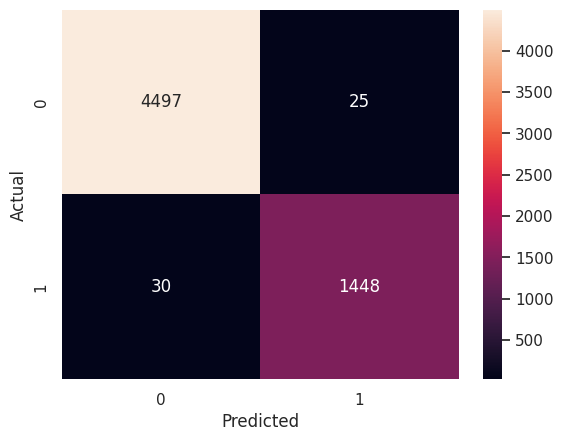

In [ ]:
# plot the confusion matrix of the  Random Forest classifier.
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')